In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def compute_len(data):
    len_all = []
    for entry in data:
        tmp_len = len(entry)
        len_all.append(tmp_len)
    return len_all

def plot_histogram(data, bin_step, name):
    # Create the histogram
    max_val = max(data)
    min_val = min(data)
    if min_val >= 100:
        min_val = 100
    else:
        min_val = 0
    bin_edges = list(range(min_val, max_val + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(180/255, 211/255, 178/255), edgecolor='black', alpha=0.99, rwidth=0.87)    
    #print(n)
    #print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Sequence Length Ranges')
    plt.xlabel('Sequence Length')
    plt.ylabel('Number of Instances')
    # plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

In [ ]:
'''    
def lysozyme_to_fasta(sequences, file_name="output.fasta"):
    with open(file_name, 'w') as file:
        for seq in sequences:
            # Extracting accession identifier and sequence
            accession = seq['sequence']['metadata']['accession']
            sequence = seq['sequence']['metadata']['sequence']
            # Writing the header with accession identifier
            file.write(f">{accession}\n")
            # Writing the amino acid sequence
            file.write(f"{sequence}\n")
     
lysozyme_data_file = os.path.join("data/filtered_data_PF00959.p") 
# Reload predicted_data from the .p file
lysozyme_data = False
with open(lysozyme_data_file, "rb") as file:
    lysozyme_data = pickle.load(file)

print(type(lysozyme_data))
print(lysozyme_data[0])

lysozyme_to_fasta(lysozyme_data, file_name="lysozymes_db.fasta")'''

In [133]:
def read_fasta(file_path):
    """
    Reads a FASTA file with a single protein sequence.
    Args:
    file_path (str): The path to the FASTA file.
    Returns:
    tuple: A tuple containing the identifier and the protein sequence as strings.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
        identifier = lines[0].strip()[4:21]  # Remove '>' and any trailing newline character
        sequence = ''.join(line.strip() for line in lines[1:])  # Concatenate the remaining lines
        return identifier, sequence
sequences_and_identifiers = []
fasta_dir = 'FASTA_lysozymes_of_interest/'
for file in os.listdir(fasta_dir):
    sequences_and_identifiers.append((read_fasta(fasta_dir + file)))
'''
P03706 = sequences_and_identifiers[1]
print(P03706)
P03706 = P03706[1]
original = P03706
original_id = 'P03706'
'''
'''
Q37875 = sequences_and_identifiers[0]
print(Q37875)
Q37875 = Q37875[1]
print(Q37875)
protein_base = 0.5
offset = int(protein_base * len(Q37875))
# Adjust for zero-based indexing
offset = offset - 1 if offset > 0 else 0
print('only offset: ', Q37875[:offset])
original = Q37875
original_id = 'Q37875'
'''
'''
P78285 = sequences_and_identifiers[2]
print(P78285)
P78285 = P78285[1]
original = P78285
original_id = 'P78285'

'''
P00720 = sequences_and_identifiers[3]
print(P00720)
P00720 = P00720[1]
original = P00720
original_id = 'P00720'


protein_base = 0.5
offset = int(protein_base * len(P00720))
# Adjust for zero-based indexing
offset = offset - 1 if offset > 0 else 0
print('only offset: ', P00720[:offset])
print(len(P00720))

('P00720|ENLYS_BPT4', 'MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNCNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRCALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSIWYNQTPNRAKRVITTFRTGTWDAYKNL')
only offset:  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNCNGVITKDEAEKLFNQDVDAAVRGILRN
164


In [148]:
import pickle
import os
# FOR SPECIFIC LYSOZYMES:
# paths to the saved .p files 
#data_dir = "Generation_PF00959_model_lr_00001_phage_specific/"

# FOR ONLY KEY GENERATION
data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned/predicted_stopped/"
#data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned_due/predicted_stopped/"
original_id = 'p'
#predicted_data_file = os.path.join(data_dir, "") 
#predicted_stopped_file = os.path.join(data_dir, "predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.75seed_percentage_0.5.p") 
#predicted_data_file = os.path.join(data_dir, "predicted_data_p0.50_p1.2_t_0.9.p") 


# Reload predicted_data from the .p file
#predicted_data = False
#with open(predicted_data_file, "rb") as file:
#    predicted_data = pickle.load(file)

# Reload predicted_data stopped from the .p file
#predicted_stopped_data = False
#with open(predicted_stopped_file, "rb") as file:
#    predicted_stopped_data = pickle.load(file)
print(os.listdir(data_dir))

['predicted_stopped_data_k3_p1.2_t_0.9.p']


In [112]:
def filter_data_for_duplicates(predicted_stopped_data, original):
    filtered_stopped_data = []
    original_count = 0
    for seq in predicted_stopped_data:
        if seq == original:
            original_count += 1
        elif seq not in filtered_stopped_data:
            filtered_stopped_data.append(seq)
    print('original_sequence_count', original_count)
    print('original length: ', len(original))
    print('stopped_generated_sequences_number: ', len(predicted_stopped_data))
    print('filtered sequences_number: ', len(filtered_stopped_data))
    print('duplicates: ', len(predicted_stopped_data) - len(filtered_stopped_data))
    #
    if len(filtered_stopped_data) < 10:
        raise ZeroDivisionError
    # average sequence length calculation
    add = 0
    for i in predicted_stopped_data:
        add += len(i)
    add /=len(predicted_stopped_data)
    print('average len calculation of generated stopped: ', add)
    add = 0
    for i in filtered_stopped_data:
        add += len(i)
    add /=len(filtered_stopped_data)
    print('average len calculation of filtered generated stopped: ', add)

    print('----------------------histograms----------------------')
    len_data = compute_len(predicted_stopped_data)
    plot_histogram(len_data, 100, 'PF_generation1')
    
    len_data = compute_len(filtered_stopped_data)
    plot_histogram(len_data, 100, 'PF_generation1_filtered')
    
    return filtered_stopped_data

#original = Q37875
#filtered_stopped_data = filter_data_for_duplicates(predicted_stopped_data, original)


predicted_stopped_data_k3_p1.2_t_0.9.p
predicted_stopped_data_k3_p1.2_t_0.9.p
original_sequence_count 0
original length:  164
stopped_generated_sequences_number:  5317
filtered sequences_number:  2753
duplicates:  2564
average len calculation of generated stopped:  192.4476208388189
average len calculation of filtered generated stopped:  212.1859789320741
----------------------histograms----------------------


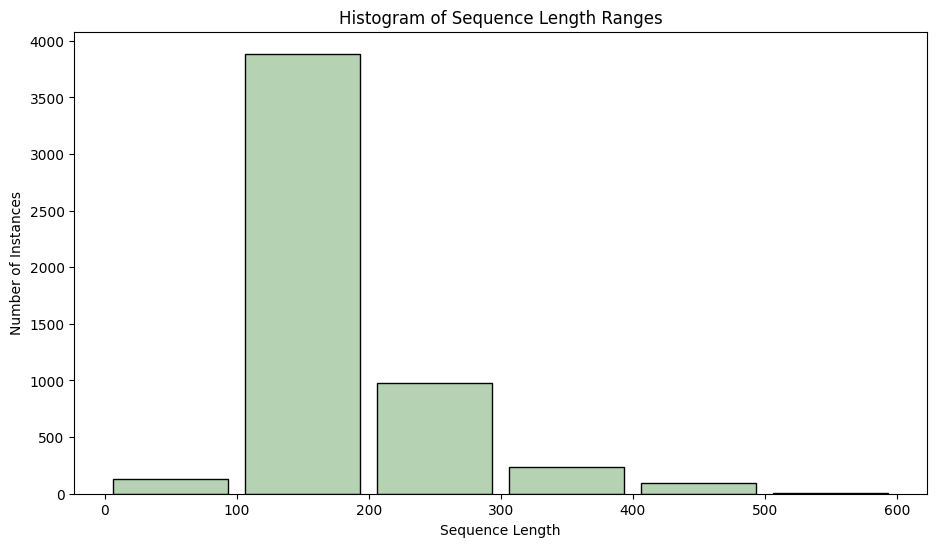

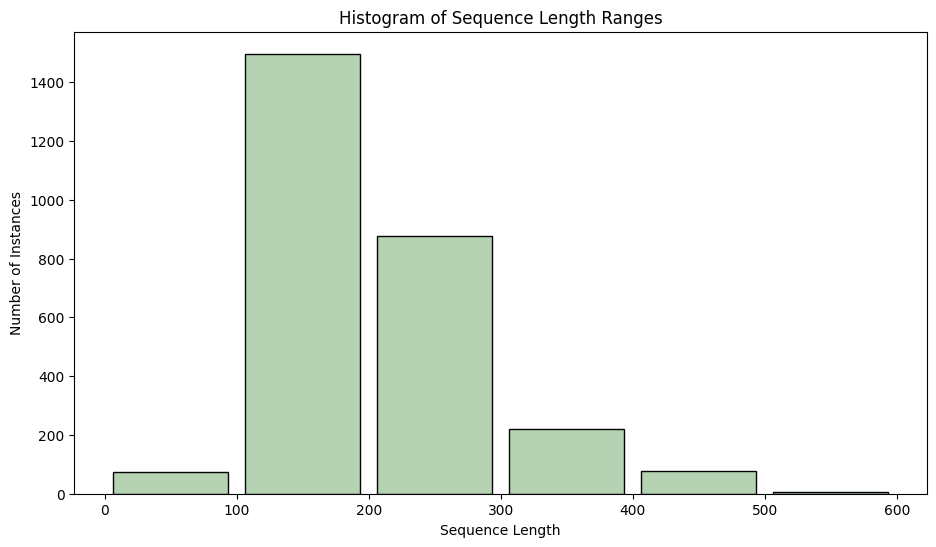

In [153]:
predicted_stopped_dictionary = {}
for filename in os.listdir(data_dir):
    print(filename)
    if 'predicted_stopped_data' in filename:
        if original_id in filename:
            predicted_stopped_data = False
            predicted_stopped_file = data_dir + filename
            with open(predicted_stopped_file, "rb") as file:
                predicted_stopped_data = pickle.load(file)
            print(filename)
            try: 
                filtered_stopped_data = filter_data_for_duplicates(predicted_stopped_data, original)
                predicted_stopped_dictionary[filename] = filtered_stopped_data
            except ZeroDivisionError:
                print('-----sequences detected less than 10-----')
            #vanno ancora tolti gli amminoacidi seed sequence based on seed percentage in keyname in dictionary

In [93]:
# we have a list of amino acid sequences, function to transform it into a FASTA format file
def list_to_fasta(sequences, file_name, original_yes, after_percentage):
    with open(file_name, 'w') as file:
        unique_sequences = []
        count = 0
        if original_yes:
            file.write(f">Original\n")
            file.write(f"{original}\n")
        unique_sequences.append(original)
        for idx, sequence in enumerate(sequences):
            if sequence not in unique_sequences:
                offset = int(len(sequence)*after_percentage)
                #print(offset)
                #print(len(sequence))
                unique_sequences.append(sequence)
                sequence = sequence[offset:]
                # Writing the header for each sequence
                file.write(f">Sequence_{idx + 1}\n")
                # Writing the amino acid sequence
                file.write(f"{sequence}\n")
            else:
                count += 1
        print('duplicates check ', count)
        print('uniques: ', len(unique_sequences))

#list_to_fasta(predicted_stopped_data, file_name="predicted_stopped_075.fasta")
# list_to_fasta(filtered_stopped_data, file_name="fasta_generated/predicted_stopped_Q37875_topp_075_seed_050_cutted.fasta")

In [126]:
for file in predicted_stopped_dictionary:
    file_fasta = file[:-2] + ".fasta"
    index_of_percentage = file.rfind('_') + 1
    after_percentage = float(file[index_of_percentage:-2])
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, False, after_percentage)

    # with original
    file_fasta = file[:-2] + '_with_original' + ".fasta"
    index_of_percentage = file.rfind('_') + 1
    after_percentage = float(file[index_of_percentage:-2])
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, True, after_percentage)

duplicates check  0
uniques:  702
duplicates check  0
uniques:  702
duplicates check  0
uniques:  37
duplicates check  0
uniques:  37
duplicates check  0
uniques:  207
duplicates check  0
uniques:  207
duplicates check  0
uniques:  37
duplicates check  0
uniques:  37
duplicates check  0
uniques:  213
duplicates check  0
uniques:  213
duplicates check  0
uniques:  180
duplicates check  0
uniques:  180
duplicates check  0
uniques:  694
duplicates check  0
uniques:  694
duplicates check  0
uniques:  814
duplicates check  0
uniques:  814
duplicates check  0
uniques:  37
duplicates check  0
uniques:  37


<h3> blast was performed on the stopped databases. i have tabular data with max id hit for each sequence </h3>

In [57]:
import pandas as pd
os.listdir(data_dir)

['predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.75.p',
 'predicted_stopped_data_P78285|LYSD_ECOLI_top_p_0.75seed_percentage_0.25.p',
 'predicted_stopped_data_P78285|LYSD_ECOLI_top_p_0.5seed_percentage_0.5.p',
 'predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.25seed_percentage_0.25.p',
 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.5seed_percentage_0.25.p',
 'predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.25.p',
 'predicted_stopped_data_P78285|LYSD_ECOLI_top_p_0.25seed_percentage_0.5.p',
 'predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.25seed_percentage_0.75.p',
 'predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.75seed_percentage_0.5.p',
 'predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.25seed_percentage_0.5.p',
 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.25seed_percentage_0.75.p',
 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.75seed_percentage_0.75.p',
 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.25seed_percentage_0

In [52]:
tab_dir = data_dir + 'Galaxy9-[unique_maxID_generatedSeqOnlyKeywords_vs_lysozymes_on_data_050].tabular'
df = pd.read_csv(tab_dir, delimiter='\t')
print(df.head(3))

            #c1          c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  c17  \
0    Sequence_1      I2UNL6  99.394  165   1   0   1  165   1  165  ...    0   
1   Sequence_10  A0A0E1FN67  99.408  169   1   0   1  169   1  169  ...    0   
2  Sequence_100  A0A2R2Q2G5  77.305  141  32   0   1  141   1  141  ...    0   

      c18 c19  c20                                                c21  \
0  100.00   1    1  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...   
1  100.00   1    1  MSNKTKYIAAVLAASAAFFVGVKNDEGFTSKPVIPVKGDRPTQGHG...   
2   86.52   1    1  MKISDNGLHITKAFEGLRLKAYQCSANVWTIGYGHTKGVHPDMEIT...   

                                                 c22  c23  c24         c25  rn  
0  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...  165  165      I2UNL6   1  
1  MSNKTKYIAAVLAASAAFFVGVKNDEGFTSKPVIPVKGDRPTQGHG...  174  169  A0A0E1FN67   1  
2  MIIDVNGLKLIKHFEGLRLRAYQCSANVWTIGYGHTAGVGPDDVIT...  405  141  A0A2R2Q2G5   1  

[3 rows x 26 columns]


In [54]:
c3_values = df['c3'].tolist()
len(c3_values)

11545

In [60]:
import matplotlib.pyplot as plt
def plot_histogram(data, bin_step, name):
    # Create the histogram
    bin_edges = list(range(60, 100 + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(125/255, 180/255, 232/255), edgecolor=(68/255, 127/255, 176/255), alpha=0.99, rwidth=0.87)    
    print(n)
    print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Max-ID Ranges')
    plt.xlabel('ID-percentage range')
    plt.ylabel('Number of Instances')
    plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[   31.   305.   119. 11090.]
[ 60  70  80  90 100]


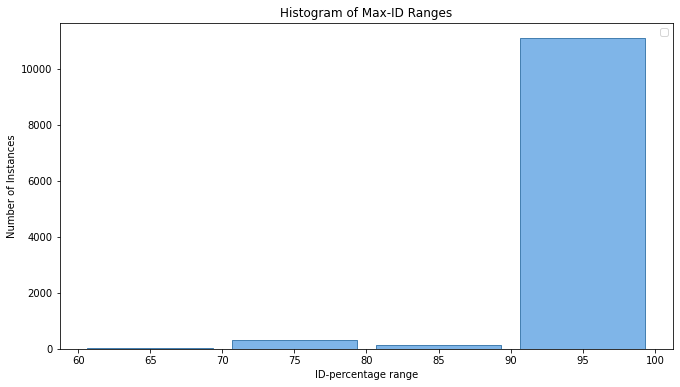

In [61]:
plot_histogram(c3_values, 10, 'max_id_050_lysozymes_generazione_solo_keywords_n_11545')